In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("gameData_v6.csv")
df.head()

,_id,correct_orange_letters,correct_purple_letters,correct_yellow_letters,enemies_killed,final_health,incorrect_orange_letters,incorrect_purple_letters,incorrect_yellow_letters,level,reason_end,time_remaining,total_bullets
0,6358dba730bdff1d4f905ec8,2,2,3,3,10,0,2,2,2,SUCCESS,83,4
1,6358dc39c6ebe50c7834f1ba,2,1,2,6,15,1,2,2,1,SUCCESS,72,19
2,6358dcadb446149f05836e8b,2,1,2,0,15,2,2,3,1,SUCCESS,83,0
3,6358e0764604d65d2fa43571,2,1,2,4,20,0,2,2,1,SUCCESS,77,27
4,6358e0a5c440047c81537340,2,2,3,5,60,1,1,0,2,SUCCESS,90,17


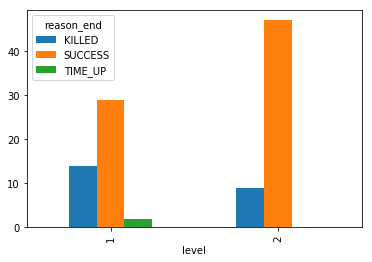

In [30]:
df_counts=df.groupby(["level", "reason_end"])[["reason_end"]].count()
df_gb = df.groupby(['level', 'reason_end']).size().unstack(level=1)
df_gb=df_gb.fillna(0)
df_gb.plot(kind="bar")

In [31]:
df_gb

reason_end,KILLED,SUCCESS,TIME_UP
level,,,
1,14.0,29.0,2.0
2,9.0,47.0,0.0


In [37]:
df_gb["ATTEMPTS"]=df_gb["KILLED"]+df_gb["SUCCESS"]+df_gb["TIME_UP"]
df_gb=df_gb.reset_index()

reason_end,level,KILLED,SUCCESS,TIME_UP,ATTEMPTS
0,1,14.0,29.0,2.0,45.0
1,2,9.0,47.0,0.0,56.0


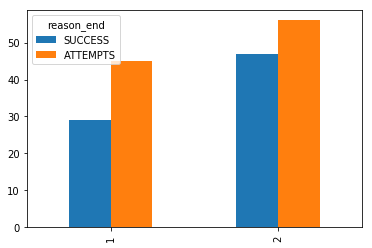

In [55]:
df_gb[["SUCCESS","ATTEMPTS"]].plot(kind="bar").set_xticklabels(df_gb.level)
df_gb